# Exercises 11




In [99]:
#@title
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects, plot_model, model_to_dot

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

In case this notebook does not work, here is the link to the google colab file

https://colab.research.google.com/drive/1RVdkdha_ECTf0cCjKU4GfZg9exsBbCTc?usp=sharing

## Exercise 11.1 - Linear regression


This first exercise is very simple because it asks us to determine a linear regression, which means we need to find the best value for the slope and for the incercept. Therefore even just a single neuron would have done the job because the weight acts as slope and the bias as intercept

In [100]:
#@title
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

sigma usata: 1.0


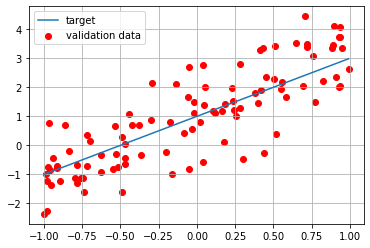

In [101]:
#@title
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

print("sigma usata: "+str(sigma))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
#@title
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
32/32 [==============================] - 0s 6ms/step - loss: 2.1862 - mse: 2.1862 - val_loss: 1.8590 - val_mse: 1.8590
Epoch 2/60
32/32 [==============================] - 0s 2ms/step - loss: 1.5303 - mse: 1.5303 - val_loss: 1.4257 - val_mse: 1.4257
Epoch 3/60
32/32 [==============================] - 0s 2ms/step - loss: 1.2636 - mse: 1.2636 - val_loss: 1.2135 - val_mse: 1.2135
Epoch 4/60
32/32 [==============================] - 0s 3ms/step - loss: 1.1356 - mse: 1.1356 - val_loss: 1.0877 - val_mse: 1.0877
Epoch 5/60
32/32 [==============================] - 0s 2ms/step - l

4/4 [==============================] - 0s 3ms/step - loss: 0.8215 - mse: 0.8215

Test loss: 0.8214997053146362
Test accuracy: 0.8214997053146362
4/4 [==============================] - 0s 3ms/step - loss: 2.8673e-04 - mse: 2.8673e-04

Test loss: 0.00028672683401964605
Test accuracy: 0.00028672683401964605


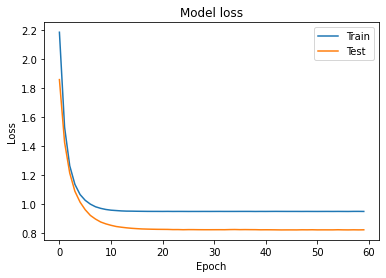

In [103]:
#@title
model.get_weights()
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

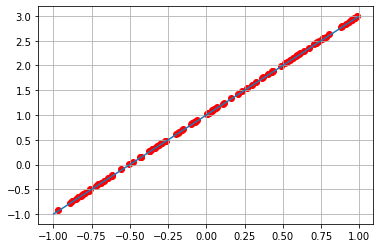

In [104]:
#@title
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

It really does manage to find the best linear regression. Fewer epochs and neurons would have still been sufficient.


## Exercise 11.2 - Third order polynomial

In this case it was important to use an activation function, otherwise we would have gotten just a line as in the exercise before

In [105]:
#@title
# target parameters of f(x) = m*x + b
a =  4
b = -3 
c = -2
d =  3

sigma usata: 0.2


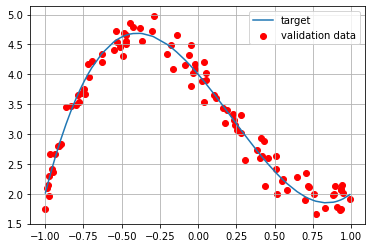

In [106]:
#@title
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a + b*x_valid + c*x_valid*x_valid + d*x_valid*x_valid*x_valid

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b*x_train + c*x_train*x_train + d*x_train*x_train*x_train, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c*x_valid*x_valid + d*x_valid*x_valid*x_valid, sigma)

print("sigma usata: "+str(sigma))
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
#@title
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(1,), activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 32)                64        
                                                                 
 dense_75 (Dense)            (None, 32)                1056      
                                                                 
 dense_76 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
32/32 [==============================] - 1s 12ms/step - loss: 10.6820 - mse: 10.6820 - val_loss: 8.0381 - val_mse: 8.0381
Epoch 2/60
32/32 [==============================] - 0s 5ms/step - loss: 7.0028 - mse: 7.0028 - val_loss: 4.0108 - val_mse: 4.0108
Epoch 3/60
32/32 [==============================] - 

4/4 [==============================] - 0s 3ms/step - loss: 0.0401 - mse: 0.0401

Test loss: 0.04007203131914139
Test accuracy: 0.04007203131914139
4/4 [==============================] - 0s 3ms/step - loss: 0.0065 - mse: 0.0065

Test loss: 0.0065473574213683605
Test accuracy: 0.0065473574213683605


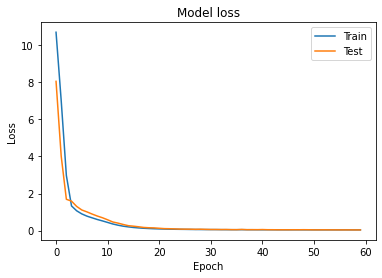

In [108]:
#@title
model.get_weights()
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

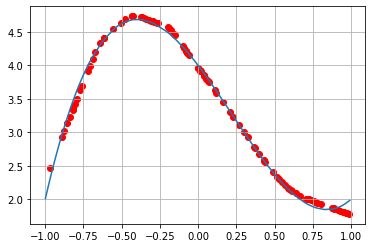

In [109]:
#@title
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

It does not do a great job near the edge, because there were not that many training points near the edge: adding more points would help solve this problem a little.

## Exercise 11.3 - Trigonometric 2D function


In this exercise we needed to change the input shape to (2, ) and to create a matrix with the x and y input values.

sigma usata: 0.1


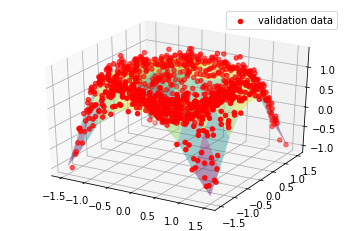

In [187]:
#@title
np.random.seed(0)
x_train = np.random.uniform(-3./2., 3./2., 10000)
x_valid = np.random.uniform(-3./2., 3./2., 1000)
y_train = np.random.uniform(-3./2., 3./2., 10000)
y_valid = np.random.uniform(-3./2., 3./2., 1000)
x_valid.sort()
x = np.outer(np.linspace(-3./2., 3./2., 10), np.ones(10))
y = x.copy().T
z = np.sin(x** 2 + y** 2)

z_target = np.sin(x_valid ** 2 + y_valid ** 2)
#z_target = np.sin(x_valid**2+y_valid**2) # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(np.sin(x_train**2+y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma)

print("sigma usata: "+str(sigma))

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.scatter(x_valid, y_valid, z_valid, color='r', label='validation data', zorder=1, depthshade=True)
ax.plot_surface(x, y, z, cmap ='viridis', zorder=-100, alpha=0.4)
#ax.plot_surface(x_valid, y_valid, z_target, label='target', cmap ='viridis', edgecolor ='green')
#ax.plot3D(x_valid, y_valid, z_target, label='target')

plt.legend()
plt.grid(True)
plt.show()

In [177]:
#@title
train_in = np.matrix([
    (x_train[i],y_train[i])
    for i in range(len(x_train))
])

valid_in = np.matrix([
    (x_valid[i],y_valid[i])
    for i in range(len(x_valid))
])

In [178]:
#@title
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(2,), activation='tanh'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=train_in, y=z_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(valid_in, z_valid))

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 32)                96        
                                                                 
 dense_138 (Dense)           (None, 64)                2112      
                                                                 
 dense_139 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2,273
Trainable params: 2,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
313/313 [==============================] - 1s 3ms/step - loss: 0.1661 - mse: 0.1661 - val_loss: 0.1403 - val_mse: 0.1403
Epoch 2/60
313/313 [==============================] - 1s 4ms/step - loss: 0.1410 - mse: 0.1410 - val_loss: 0.1322 - val_mse: 0.1322
Epoch 3/60
313/313 [==============================]

32/32 [==============================] - 0s 1ms/step - loss: 0.0115 - mse: 0.0115

Test loss: 0.011495095677673817
Test accuracy: 0.011495095677673817
32/32 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015

Test loss: 0.0015134625136852264
Test accuracy: 0.0015134625136852264


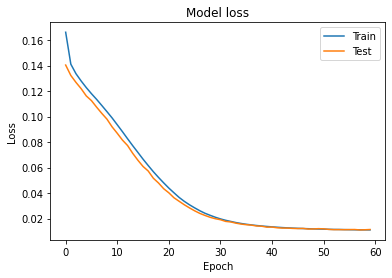

In [179]:
#@title
model.get_weights()
score = model.evaluate(valid_in, z_valid, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(valid_in, z_target, batch_size=32, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

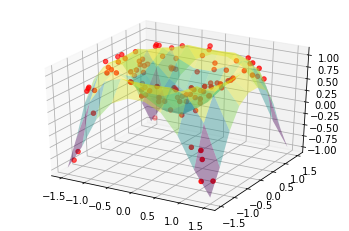

In [186]:
#@title
x_predicted = np.random.uniform(-3./2., 3./2., 100)
y_predicted = np.random.uniform(-3./2., 3./2., 100)

predicted_in = np.matrix([
    (x_predicted[i],y_predicted[i])
    for i in range(len(x_predicted))
])


z_predicted = model.predict(predicted_in)

x = np.outer(np.linspace(-3./2., 3./2., 10), np.ones(10))
y = x.copy().T
z = np.sin(x** 2 + y** 2)

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.scatter(x_predicted, y_predicted, z_predicted, color='r', depthshade=True)
ax.plot_surface(x, y, z, cmap ='viridis', alpha=0.4)
#ax.plot_surface(x_valid, y_valid, z_target, label='target', cmap ='viridis', edgecolor ='green')
#ax.plot3D(x_valid, y_valid, z_target, label='target')

plt.grid(True)
plt.show()



As this is a more difficult problem, we can see that more epoch were necessaries to train our model.